# Flow visualization

This doument contains the image processing used to visualize the frames taken from the videos

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import os
import sys
%matplotlib tk
#%matplotlib inline

In [10]:
def get_frames(dir_video, dir_frames):
    """
    Description
    ----------
    Save the frames of a video in a folder as independent images.

    Parameters
    ----------
    dir_video : Video directory
    dir_frames : Directory where the images of the frames will be stored

    Returns
    -------
    None
    """    
    cap= cv2.VideoCapture(dir_video)
    i=0
    os.mkdir(dir_frames)
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        cv2.imwrite(dir_frames + 'kang'+str(i)+'.jpg',frame)
        i+=1
    cap.release()
    cv2.destroyAllWindows()
    

def get_frame_norm(dir_frame_n, dir_frame_b,x = 570, x_0 = 400, y=840, y_0 = 400):
    """
    Description
    ----------
    Takes the section of the image where the mirror appears and normalizes it with respect to a background image

    Parameters
    ----------
    dir_frame_n : Frame image directory
    dir_frame_b : Background Frame Directory

    Returns
    -------
    norm_image : Mirror image normalized to background
    """    

    img = image.imread(dir_frame_n)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    back = image.imread(dir_frame_b)
    back_gray = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)
    
    norm_image = img_gray[:,:][x:x+x_0,y:y+y_0]/back_gray[:,:][x:x+x_0,y:y+y_0]
    return norm_image

def contrast_plot(frame, x_min = -0.5, x_max = 0.5, bar_label = r'Contrast', save = 'off'):
    """
    Description
    ----------
    Plots the processed image

    Parameters
    ----------
    frame : Mirror image normalized to background
    x_min : Minimum of contrast
    x_max : Maximum of contrast
    bar_label : label of scale
    save : if the image must be saved

    Returns
    -------
    None
    """    

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    p =plt.imshow(frame)
    cbar = fig.colorbar(p, ax=ax)
    plt.clim(x_min,x_max)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel(bar_label, rotation=-270, fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    plt.ylabel('y  [pixel]', fontsize = 20)
    plt.xlabel('x  [pixel]', fontsize = 20)
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    
    if save != 'off':
        plt.savefig('images/' + save + '.pdf', dpi = 720)
    
# Unsuccessful attempt to obtain a refractive index map    
# def get_n_teo(t):   
#     t_0 = 18
#     n_0=1.000271
#     n = ((1+0.00366*t_0)/(1+0.003661*t))*(n_0-1)+1
#     return n

# def get_n_contrast(contrast, n_0 = 1.000271, scale = 'linear', th = 1.2):
#     if scale == 'log':
#         mask = contrast < th
#         contrast[mask] = np.nan
#         n_compute = np.exp(contrast)*(n_0-1) +1
#     else:
#         n_compute = contrast*(n_0-1) +1
#         mask1 = n_compute < th
#         n_compute[mask1] = np.nan 
#     return n_compute

In [10]:
# Opens the Video file
#name_video = 'data""only light.mp4'
cap= cv2.VideoCapture('data/Heater 150.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    try:
        os.mkdir("Heater_150/")
    cv2.imwrite('Heater_150/kang'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

In [5]:
img = image.imread("Heater_150/kang859.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
back = image.imread("Heater_150/kang367.jpg")
back_gray = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

We choosed one of the three color channels

<ipython-input-201-ceec9be44f4c>:3: RuntimeWarning: divide by zero encountered in true_divide
  p = plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,2][400:1000,750:1300]))
<ipython-input-201-ceec9be44f4c>:3: RuntimeWarning: invalid value encountered in true_divide
  p = plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,2][400:1000,750:1300]))
<ipython-input-201-ceec9be44f4c>:3: RuntimeWarning: divide by zero encountered in log
  p = plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,2][400:1000,750:1300]))


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

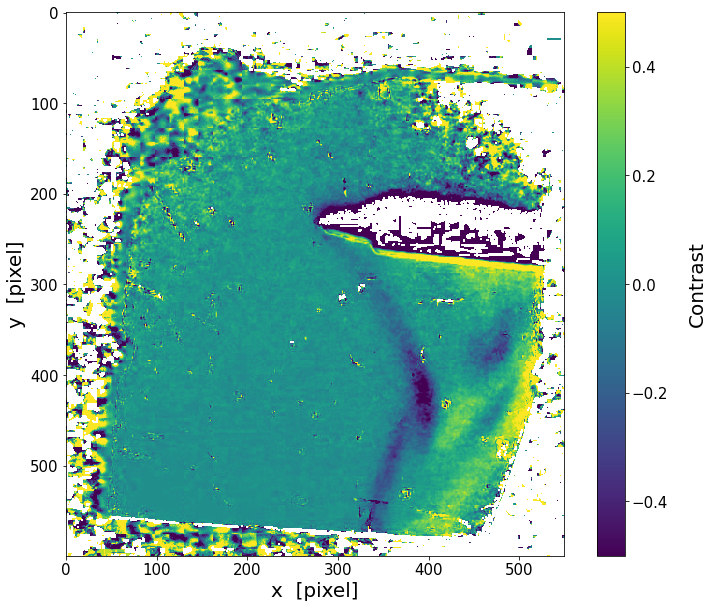

In [201]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
p = plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,2][400:1000,750:1300]))

plt.clim(-0.5,0.5)


cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel(r'Contrast', rotation=-270, fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.ylabel('y  [pixel]', fontsize = 20)
plt.xlabel('x  [pixel]', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

The imperfentions of the mirror were annoying. We decided to use the gray scale to combine the information of the three channels and to smooth out those imperfetions 

In [139]:
# in gray

fig = plt.figure(figsize=(12, 10))
plt.imshow((np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))
plt.colorbar()
plt.clim(-0.5,0.5)

<ipython-input-139-b0cc1f30ece3>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow((np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))
<ipython-input-139-b0cc1f30ece3>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow((np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))
<ipython-input-139-b0cc1f30ece3>:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow((np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))


In [141]:
# in gray

fig = plt.figure(figsize=(12, 10))
plt.imshow(abs(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))
plt.colorbar()
plt.clim(0,0.5)

<ipython-input-141-21333ac41180>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow(abs(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))
<ipython-input-141-21333ac41180>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(abs(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))
<ipython-input-141-21333ac41180>:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(abs(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300])))


<ipython-input-448-8e8292763f68>:3: RuntimeWarning: divide by zero encountered in true_divide
  contrast_plot(abs(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])),
<ipython-input-448-8e8292763f68>:3: RuntimeWarning: invalid value encountered in true_divide
  contrast_plot(abs(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])),
<ipython-input-448-8e8292763f68>:3: RuntimeWarning: divide by zero encountered in log10
  contrast_plot(abs(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])),


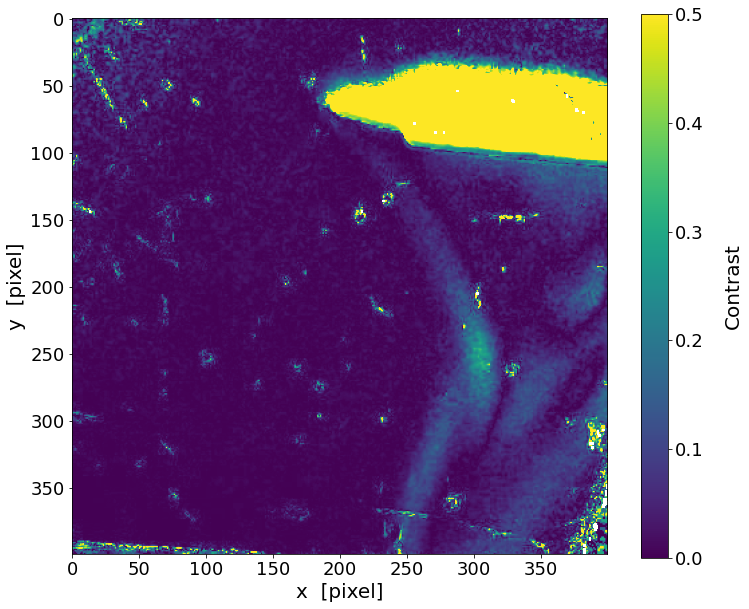

In [448]:
x = 570
y = 840
contrast_plot(abs(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])),
              save='Heater_150_con_abs', x_max=0.5, x_min=0)

Taking the absolute value above we see the regions where the index of refraction varies, regardless of whether it decreases or increases, only in magnitude. Below is an example without the absolute value.

<ipython-input-310-0fcb4f82129c>:3: RuntimeWarning: divide by zero encountered in true_divide
  contrast_plot(np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]), save='Heater_150_con')
<ipython-input-310-0fcb4f82129c>:3: RuntimeWarning: invalid value encountered in true_divide
  contrast_plot(np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]), save='Heater_150_con')
<ipython-input-310-0fcb4f82129c>:3: RuntimeWarning: divide by zero encountered in log
  contrast_plot(np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]), save='Heater_150_con')


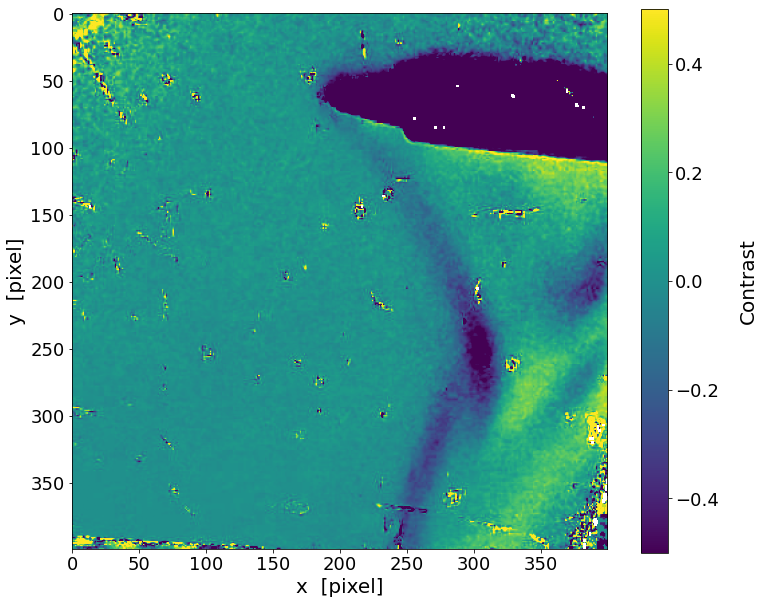

In [310]:
x = 570
y = 840
contrast_plot(np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]), save='Heater_150_con')

In [12]:
x = 570
y = 840
contrast_plot(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]),
              x_min=-0.2,x_max=0.2, save='Heater_150_con')

<ipython-input-12-661a86510557>:3: RuntimeWarning: divide by zero encountered in true_divide
  contrast_plot(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]),
<ipython-input-12-661a86510557>:3: RuntimeWarning: invalid value encountered in true_divide
  contrast_plot(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]),
<ipython-input-12-661a86510557>:3: RuntimeWarning: divide by zero encountered in log10
  contrast_plot(np.log10(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]),


Below is an attempt to map the index of refraction using the images. This was not included in the report but was included in the appendix to the presentation.

In [6]:
t = 150
t_0 = 18
n_0=1.000271
n = ((1+0.00366*t_0)/(1+0.003661*t))*(n_0-1)+1
c = (n-1)/(n_0-1)
n

1.0001864593357648

In [13]:
const = np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])
contrac = img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]
mask = const < - 1.2
const[mask] = np.nan 
n_compute = np.exp(const)*(n_0-1) +1
n_compute1 = contrac*(n_0-1) +1
mask1 = n_compute1 < 1.00002
n_compute1[mask1] = np.nan 

fig = plt.figure(figsize=(12, 10))
plt.imshow(n_compute1)
plt.colorbar()
plt.clim(1.00001,1.00035)

<ipython-input-13-82dc40f7e829>:1: RuntimeWarning: divide by zero encountered in true_divide
  const = np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])
<ipython-input-13-82dc40f7e829>:1: RuntimeWarning: invalid value encountered in true_divide
  const = np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])
<ipython-input-13-82dc40f7e829>:1: RuntimeWarning: divide by zero encountered in log
  const = np.log(img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400])
<ipython-input-13-82dc40f7e829>:2: RuntimeWarning: divide by zero encountered in true_divide
  contrac = img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]
<ipython-input-13-82dc40f7e829>:2: RuntimeWarning: invalid value encountered in true_divide
  contrac = img_gray[:,:][x:x+400,y:y+400]/back_gray[:,:][x:x+400,y:y+400]


In [14]:
fig = plt.figure(figsize=(12, 10))
plt.imshow(n_0-abs(n_compute-n_0))
plt.colorbar()
#plt.clim(1.0001-n_0,1.0009-n_0)
plt.clim(1.00001,1.00035)

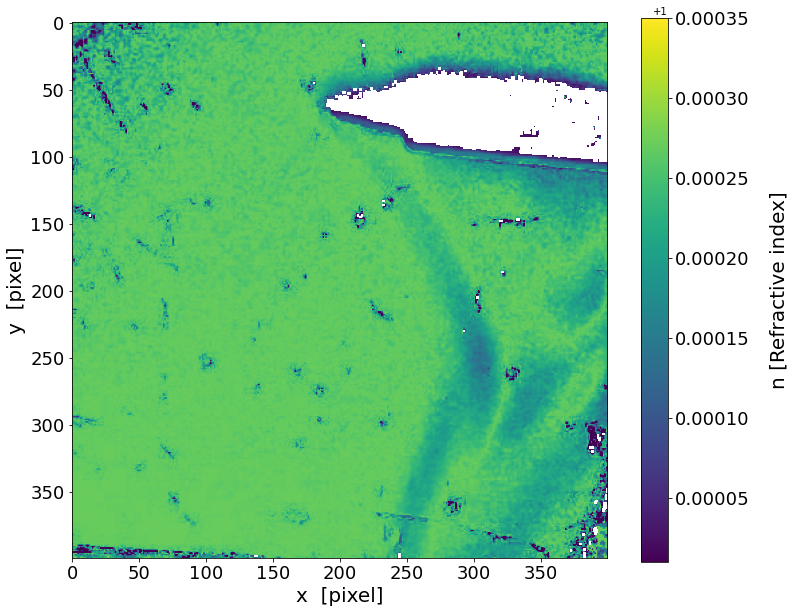

In [329]:
contrast_plot(n_0-abs(n_compute1-n_0), save='Heater_150_n_estima', x_min = 1.00001, x_max=1.00035, 
              bar_label = 'n [Refractive index]')

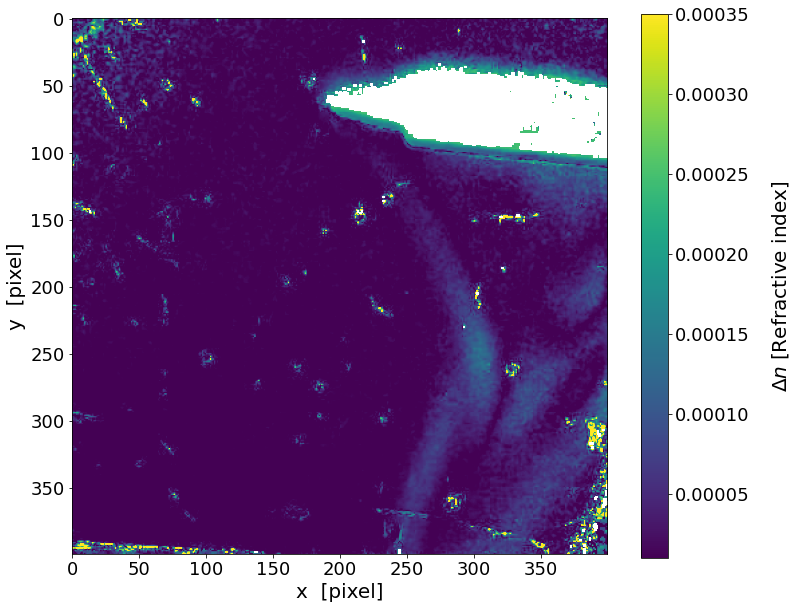

In [331]:
contrast_plot(abs(n_compute1-n_0), save='Heater_150_dn_estima', x_min = 0.00001, x_max=0.00035, 
              bar_label = r'$\Delta n$ [Refractive index]')

Below are examples of how we have used visualization techniques for the different objects in front of the mirror.

# Heater 450

In [168]:
get_frames('data/Heater 450.mp4', 'Heater_450/')

<ipython-input-333-5d83a2c8925e>:21: RuntimeWarning: divide by zero encountered in true_divide
  return img_gray[:,:][x:x+x_0,y:y+y_0]/back_gray[:,:][x:x+x_0,y:y+y_0]
<ipython-input-333-5d83a2c8925e>:21: RuntimeWarning: invalid value encountered in true_divide
  return img_gray[:,:][x:x+x_0,y:y+y_0]/back_gray[:,:][x:x+x_0,y:y+y_0]
<ipython-input-354-0e3858295080>:2: RuntimeWarning: divide by zero encountered in log10
  contrast_plot(np.log10(norm), x_min = -1, x_max = 1, save='Heater_450')


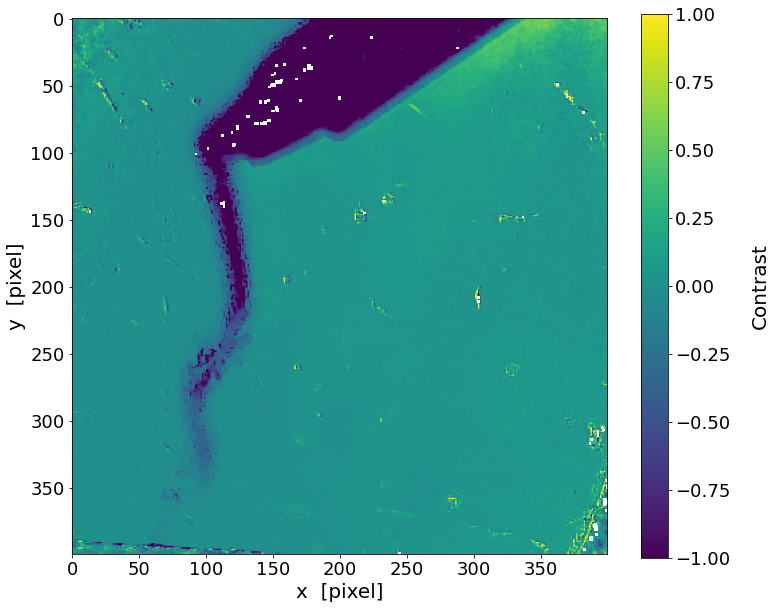

In [354]:
norm = get_frame_norm('Heater_450/kang624.jpg', "Heater_150/kang367.jpg")
contrast_plot(np.log10(norm), x_min = -1, x_max = 1, save='Heater_450')

In [418]:
get_n_teo(450)

1.0001091063022909

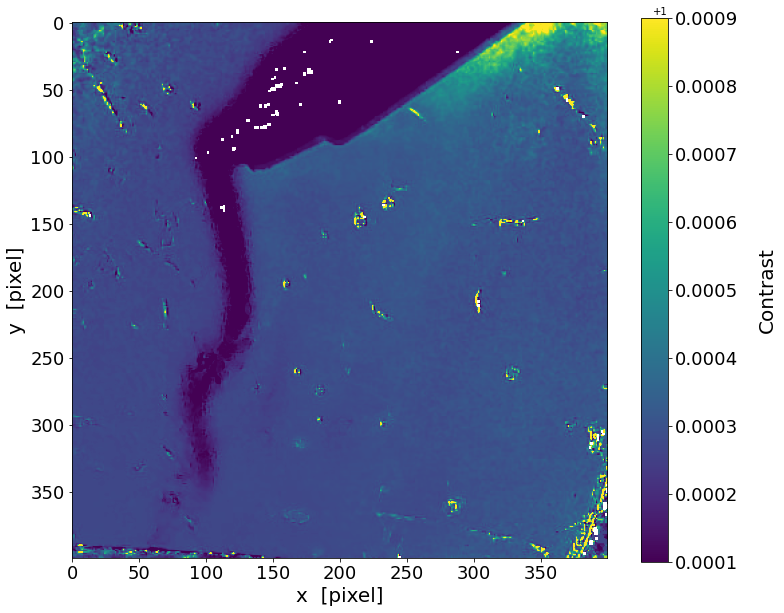

In [420]:
n = get_n_contrast(norm, th = 1.00000001)
#%matplotlib tk
%matplotlib inline
contrast_plot(n, x_min = 1.0001, x_max = 1.0009)

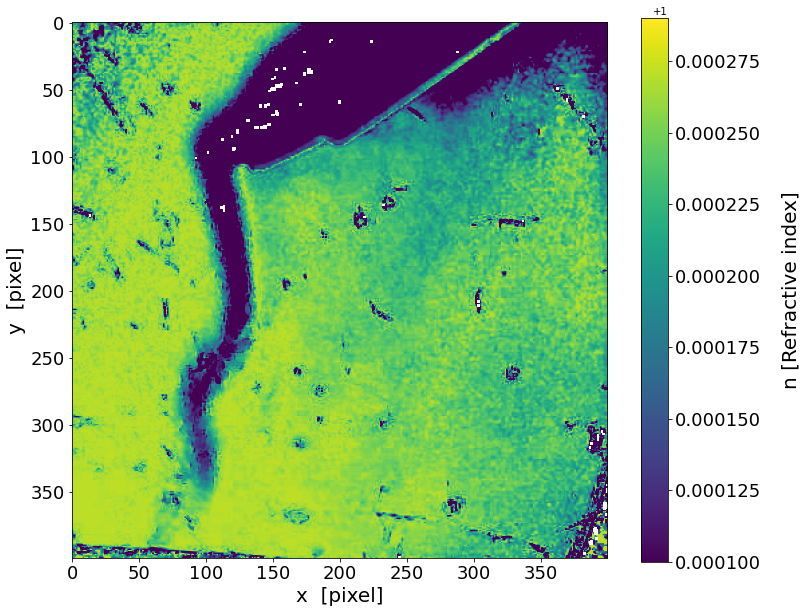

In [422]:
contrast_plot(n_0-abs(n-n_0), x_min = 1.0001, x_max=1.00029, 
              bar_label = 'n [Refractive index]', save='Heater_450_n_estima')

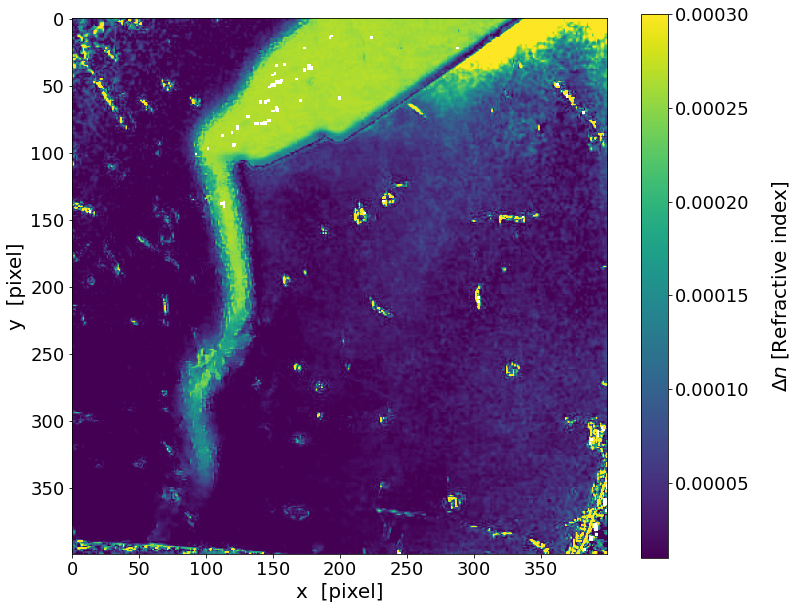

In [430]:
contrast_plot(abs(n-n_0), x_min = 0.00001, x_max = 0.0003, 
              bar_label = r'$\Delta n$ [Refractive index]', save='Heater_450_dn_estima')

## Ice

In [29]:
img = image.imread("Ice_Salty/kang895.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
back = image.imread("Ice_Salty/kang861.jpg")
back_gray = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

In [30]:
fig = plt.figure(figsize=(12, 10))
plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,1][400:1000,750:1300]))
plt.colorbar()
plt.clim(-0.5,0.5)

<ipython-input-30-8b4a6e4da2ef>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,1][400:1000,750:1300]))
<ipython-input-30-8b4a6e4da2ef>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,1][400:1000,750:1300]))
<ipython-input-30-8b4a6e4da2ef>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(img[:,:,2][400:1000,750:1300]/back[:,:,1][400:1000,750:1300]))


<ipython-input-267-ef47cdefdc84>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300]))
<ipython-input-267-ef47cdefdc84>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300]))
<ipython-input-267-ef47cdefdc84>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300]))


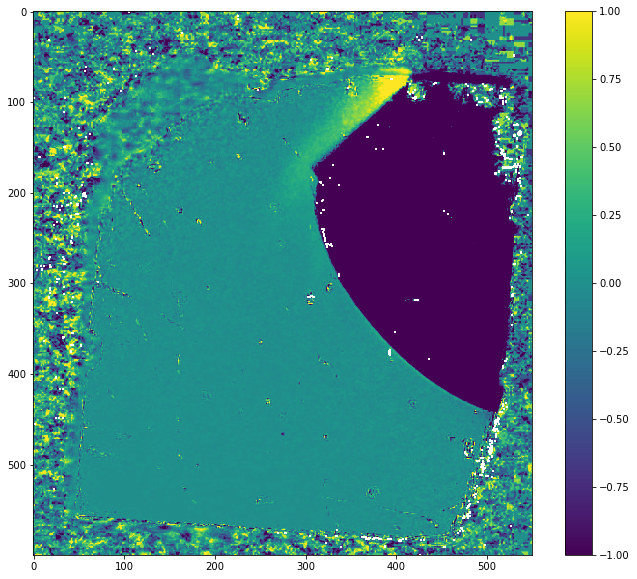

In [267]:
# in gray
fig = plt.figure(figsize=(12, 10))
plt.imshow(np.log(img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300]))
plt.colorbar()
plt.clim(-1,1)

In [37]:
norm = img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300]
contrast_plot(np.log10(norm), x_min = -0.7, x_max = 0.7)

n = get_n_contrast(norm, th = 1.00000001)
contrast_plot(n, x_min = 1.0001, x_max = 1.0009)

<ipython-input-37-ffaff3553034>:1: RuntimeWarning: divide by zero encountered in true_divide
  norm = img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300]
<ipython-input-37-ffaff3553034>:1: RuntimeWarning: invalid value encountered in true_divide
  norm = img_gray[:,:][400:1000,750:1300]/back_gray[:,:][400:1000,750:1300]
<ipython-input-37-ffaff3553034>:2: RuntimeWarning: divide by zero encountered in log10
  contrast_plot(np.log10(norm), x_min = -0.7, x_max = 0.7)


In [32]:
get_n_teo(-27)

1.0003205376667446

In [38]:
%matplotlib tk
contrast_plot(n_0+abs(n-n_0), x_min = 1.00025, x_max=1.0004, 
              bar_label = 'n [Refractive index]')#, save='salti_n_estima')

In [34]:
n = get_n_contrast(norm, th = 1.00000001)
#%matplotlib tk
#%matplotlib inline
contrast_plot(n, x_min = 1.0001, x_max = 1.0009)

# Lighter Video

In [191]:
get_frames('data/Lighter Video.mp4', 'Lighte/')

In [40]:
norm = get_frame_norm('Lighte/kang116.jpg', "Lighte/kang15.jpg", x=520)
contrast_plot(np.log10(norm), x_min = -0.4, x_max = 0.3, save='Lighter_con')

<ipython-input-10-4f68fce33700>:21: RuntimeWarning: divide by zero encountered in true_divide
  return img_gray[:,:][x:x+x_0,y:y+y_0]/back_gray[:,:][x:x+x_0,y:y+y_0]
<ipython-input-10-4f68fce33700>:21: RuntimeWarning: invalid value encountered in true_divide
  return img_gray[:,:][x:x+x_0,y:y+y_0]/back_gray[:,:][x:x+x_0,y:y+y_0]
<ipython-input-40-18394d75a595>:2: RuntimeWarning: divide by zero encountered in log10
  contrast_plot(np.log10(norm), x_min = -0.4, x_max = 0.3, save='Lighter_con')


In [41]:
n = get_n_contrast(norm, th = 1.00000001)
contrast_plot(n, x_min = 1.0001, x_max = 1.0009)

In [42]:
fig = plt.figure(figsize=(12, 10))
plt.imshow(n_0+abs(n-n_0))
plt.colorbar()
#plt.clim(1.0001-n_0,1.0009-n_0)
plt.clim(1.0002,1.0007)

In [46]:
contrast_plot(n_0+abs(n-n_0), x_min = 1.00025, x_max=1.0006, 
              bar_label = 'n [Refractive index]', save='butane_n_estima')

In [264]:
#%matplotlib tk
%matplotlib inline

# Liquid Nitrogen

In [432]:
get_frames('data/Liquid_Nitrogen.mp4', 'Liquid_Nitrogen/')

In [47]:
norm = get_frame_norm('Liquid_Nitrogen/kang502.jpg', "Heater_150/kang367.jpg", x = 520, y = 860)
contrast_plot(np.log10(norm), x_min = -0.2, x_max = 0.5, save='Nitrogen_con')

<ipython-input-10-4f68fce33700>:21: RuntimeWarning: divide by zero encountered in true_divide
  return img_gray[:,:][x:x+x_0,y:y+y_0]/back_gray[:,:][x:x+x_0,y:y+y_0]
<ipython-input-10-4f68fce33700>:21: RuntimeWarning: invalid value encountered in true_divide
  return img_gray[:,:][x:x+x_0,y:y+y_0]/back_gray[:,:][x:x+x_0,y:y+y_0]
<ipython-input-47-7baa6ae2d9e8>:2: RuntimeWarning: divide by zero encountered in log10
  contrast_plot(np.log10(norm), x_min = -0.2, x_max = 0.5, save='Nitrogen_con')


In [48]:
n = get_n_contrast(norm, th = 1.00005)
contrast_plot(n_0+abs(n-n_0), x_min = 1.00025, x_max = 1.0006, bar_label = r'$n$ [Refractive index]')#,
             #save='Nitrogen_n_estim')

In [515]:
#%matplotlib tk
%matplotlib inline

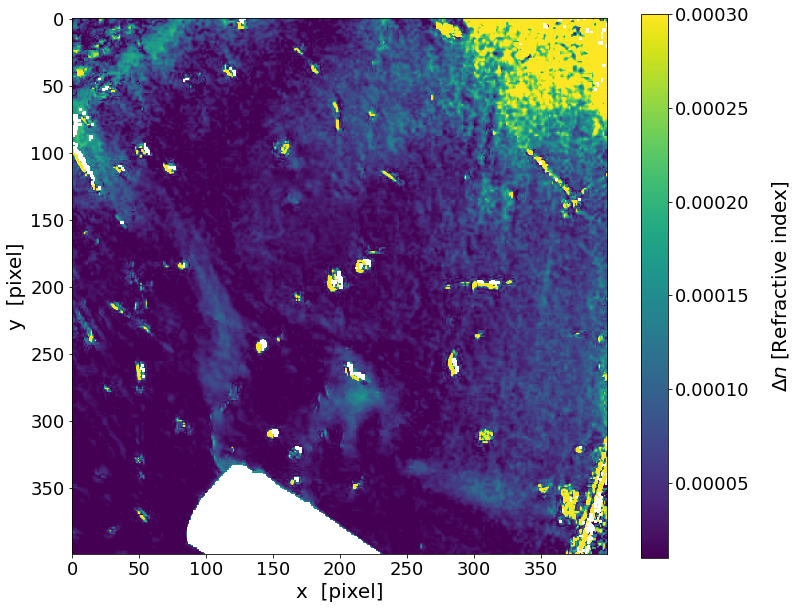

In [516]:
contrast_plot(abs(n-n_0), x_min = 0.00001, x_max = 0.0003, 
              bar_label = r'$\Delta n$ [Refractive index]',save='Nitrogen_dn_estim')